In [31]:
import pandas as pd
import re

def get_value_for_id(id: str, row_content: str):
    player_values = row_content[14:].split('|')
    player_values = [p.strip() for p in player_values]

    for p in player_values:
        if p.find(id) != -1:
            stack = re.search('\((.*)\)', p).group(1)
            return float(stack)
            
    

df = pd.read_csv (r'input.csv')

df.drop(df.index[df['entry'].str.startswith("Player") == False], inplace=True)
             

id_to_player_mapping = {
    '7TP78l9kGR': 'tom',
    'VUdv-wN0K4': 'damo',
    '9gQ_8P10M1': 'jordan',
}

output = pd.DataFrame(columns=id_to_player_mapping.values())

for index, row in df.iterrows():
    new_row = {}
    # print(row)

    for key, value in id_to_player_mapping.items():
        v = get_value_for_id(key, row.entry)
        stack = v if v is not None else 0
        # print()
        # print(value)
        # print(v)
        new_row[value] = stack

    # output.append(new_row)
    output.loc[len(output)] = new_row.values()

output

Empty DataFrame
Columns: [tom, damo, jordan]
Index: []


,tom,damo,jordan
0,1854.0,8126.0,1000.0
1,2004.0,7976.0,0.0
2,668.0,8372.0,940.0
3,938.0,8042.0,1000.0
4,948.0,8032.0,0.0
...,...,...,...
253,1010.0,1360.0,630.0
254,1010.0,1120.0,870.0
255,1070.0,1060.0,870.0
256,1000.0,1120.0,880.0


range(258, 0, -1)


<function matplotlib.pyplot.show(close=None, block=None)>

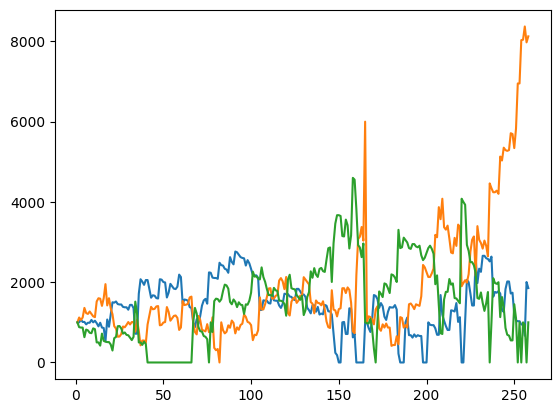

In [42]:
import matplotlib.pyplot as plt

rows_in_out = len(df.index)
x_axis = range(rows_in_out, 0, -1)
print(x_axis)

for p in id_to_player_mapping.values():
    plt.plot(x_axis, output[p])
    plt.legend(p)

plt.show